# TASK-3 Number Recognition

# import libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

# Load the MNIST dataset

In [2]:
mnist = fetch_openml("mnist_784", version=1)
X, y = mnist.data, mnist.target

# Split the data into training and testing sets

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Preprocess the data by scaling it

In [4]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train a Multi-Layer Perceptron (MLP) classifier

In [5]:
model = MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)
model.fit(X_train, y_train)


MLPClassifier(hidden_layer_sizes=(128, 64), max_iter=1000, random_state=42)

# Make predictions on the test data

In [6]:
y_pred = model.predict(X_test)

# Evaluate the model

In [7]:
accuracy = accuracy_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Confusion Matrix:")
print(confusion)
print("Classification Report:")
print(classification_rep)

Accuracy: 0.9516428571428571
Confusion Matrix:
[[1310    1    7    1    1    1   13    1    5    3]
 [   1 1579    4    4    2    0    0    7    3    0]
 [   2   11 1336    7    3    0    3    9    8    1]
 [   1    4   19 1379    1    6    0   10    7    6]
 [   1    0    6    0 1263    0    2   11    2   10]
 [   5    4   10   54    6 1108   21    9   52    4]
 [  11   10    8    0   24    1 1330    1   11    0]
 [   1    3   14    2    4    0    0 1469    0   10]
 [   4   18   39   16    3    3    6   13 1246    9]
 [   6    8    6    9   30    1    0   39   18 1303]]
Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.96      0.99      0.98      1600
           2       0.92      0.97      0.94      1380
           3       0.94      0.96      0.95      1433
           4       0.94      0.98      0.96      1295
           5       0.99      0.87      0.93      1273
           6       0

# Visualize some test samples and their predictions

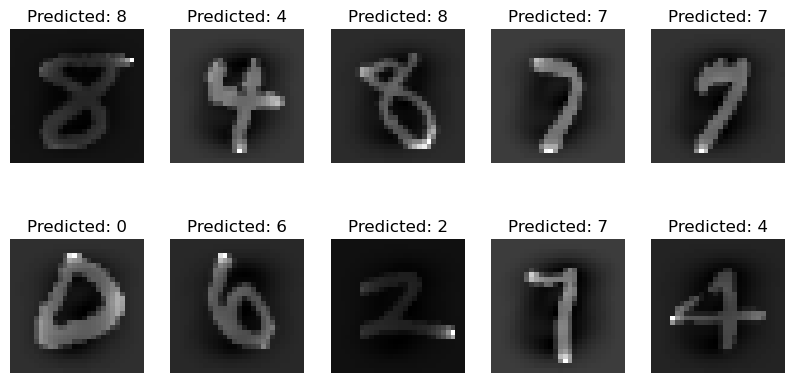

In [8]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_test[i].reshape(28, 28), cmap='gray')
    plt.title(f'Predicted: {y_pred[i]}')
    plt.axis('off')
plt.show()